## IMPORTNG RELEVANT MODULES

In [1]:
import pandas as pd
import numpy as np

#import datetime
#from datetime import date, timedelta

import plotly.graph_objects as go
import plotly.express as px

import plotly.io as pio
pio.templates.default = 'plotly_white'
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


**READING AND CHECKING THE DATA**

In [42]:
control_data = pd.read_csv('control_group.csv', sep = ';')#sep gives spaces to data clumped together
control_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
control_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Campaign_Name          30 non-null     object 
 1   Date                   30 non-null     object 
 2   Amount_spent           30 non-null     int64  
 3   Number_of_impressions  30 non-null     float64
 4   Reach                  30 non-null     float64
 5   Website_Clicks         30 non-null     float64
 6   Searches_Received      30 non-null     float64
 7   Content_Viewed         30 non-null     float64
 8   Added_to_Cart          30 non-null     float64
 9   Purchases              30 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [14]:
control_data['Date'] = pd.to_datetime(control_data['Date'])

In [15]:
control_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Campaign_Name          30 non-null     object        
 1   Date                   30 non-null     datetime64[ns]
 2   Amount_spent           30 non-null     int64         
 3   Number_of_impressions  30 non-null     float64       
 4   Reach                  30 non-null     float64       
 5   Website_Clicks         30 non-null     float64       
 6   Searches_Received      30 non-null     float64       
 7   Content_Viewed         30 non-null     float64       
 8   Added_to_Cart          30 non-null     float64       
 9   Purchases              30 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.5+ KB


In [4]:
control_data.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64

In [5]:
control_data.duplicated().sum()

0

In [57]:
control_data.columns = ['Campaign_Name', 'Date', 'Amount_spent', 'Number_of_impressions', 'Reach', 'Website_Clicks',
                       'Searches_Received', 'Content_Viewed', 'Added_to_Cart', 'Purchases']

In [16]:
# the control data has some missing values, we will fill it in using the mean

control_data['Number_of_impressions'].fillna(value=control_data['Number_of_impressions'].mean(), inplace=True)
control_data['Reach'].fillna(value=control_data['Reach'].mean(), inplace=True)
control_data['Website_Clicks'].fillna(value=control_data['Website_Clicks'].mean(), inplace=True)
control_data['Searches_Received'].fillna(value=control_data['Searches_Received'].mean(), inplace=True)
control_data['Content_Viewed'].fillna(value=control_data['Content_Viewed'].mean(), inplace=True)
control_data['Added_to_Cart'].fillna(value=control_data['Added_to_Cart'].mean(), inplace=True)
control_data['Purchases'].fillna(value=control_data['Purchases'].mean(), inplace=True)
control_data.head()

,Campaign_Name,Date,Amount_spent,Number_of_impressions,Reach,Website_Clicks,Searches_Received,Content_Viewed,Added_to_Cart,Purchases
0,Control Campaign,2019-01-08,2280,82702.000000,56930.000000,7016.000000,2290.000000,2159.000000,1819.0,618.000000
1,Control Campaign,2019-02-08,1757,121040.000000,102513.000000,8110.000000,2033.000000,1841.000000,1219.0,511.000000
2,Control Campaign,2019-03-08,2343,131711.000000,110862.000000,6508.000000,1737.000000,1549.000000,1134.0,372.000000
3,Control Campaign,2019-04-08,1940,72878.000000,61235.000000,3065.000000,1042.000000,982.000000,1183.0,340.000000
4,Control Campaign,2019-05-08,1835,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.0,522.793103


In [52]:
control_data.describe()

,Amount_spent,Number_of_impressions,Reach,Website_Clicks,Searches_Received,Content_Viewed,Added_to_Cart,Purchases
count,30.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2288.433333,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.000000,522.793103
std,367.334451,21688.922908,21832.349595,1757.369003,866.089368,777.545469,407.457973,185.028642
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,1945.500000,92029.000000,74192.000000,4085.000000,1615.000000,1249.000000,930.000000,372.000000
50%,2299.500000,113430.000000,91579.000000,5224.000000,2390.000000,1984.000000,1339.000000,501.000000
75%,2532.000000,121332.000000,102479.000000,6628.000000,2711.000000,2421.000000,1641.000000,670.000000
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000


In [77]:
control_profit = control_data['Purchases'].sum() - control_data['Amount_spent'].sum()
control_profit

-53492.0

In [58]:
test_data = pd.read_csv('test_group.csv', sep = ';')
test_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [18]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [20]:
test_data['Date'] = pd.to_datetime(test_data['Date'])
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Campaign Name        30 non-null     object        
 1   Date                 30 non-null     datetime64[ns]
 2   Spend [USD]          30 non-null     int64         
 3   # of Impressions     30 non-null     int64         
 4   Reach                30 non-null     int64         
 5   # of Website Clicks  30 non-null     int64         
 6   # of Searches        30 non-null     int64         
 7   # of View Content    30 non-null     int64         
 8   # of Add to Cart     30 non-null     int64         
 9   # of Purchase        30 non-null     int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 2.5+ KB


In [21]:
test_data.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

In [22]:
test_data.duplicated().sum()

0

In [59]:
test_data.columns = ['Campaign_Name', 'Date', 'Amount_spent', 'Number_of_impressions', 'Reach', 'Website_Clicks',
                       'Searches_Received', 'Content_Viewed', 'Added_to_Cart', 'Purchases']


In [54]:
test_data.describe()

,Amount_spent,Number_of_impressions,Reach,Website_Clicks,Searches_Received,Content_Viewed,Added_to_Cart,Purchases
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
std,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745
min,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000


In [74]:
test_profit = test_data['Purchases'].sum() - test_data['Amount_spent'].sum()
test_profit

-61255

In [78]:
#merging the two datasets 
ab_data = control_data.merge(test_data, how='outer').sort_values(['Date'])
ab_data = ab_data.reset_index(drop = True)
ab_data.head()

,Campaign_Name,Date,Amount_spent,Number_of_impressions,Reach,Website_Clicks,Searches_Received,Content_Viewed,Added_to_Cart,Purchases
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,1.08.2019,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Test Campaign,10.08.2019,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0
3,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
4,Test Campaign,11.08.2019,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0


### FINDING THE BEST MARKETING STRATEGY

In [85]:
figure = px.scatter(data_frame = ab_data,
                   x = 'Number_of_impressions',
                   y = 'Amount_spent',
                  size = 'Amount_spent',
                   color = 'Campaign_Name',
                    title= 'Number Of Impressions Vs Amount Spent',
                   trendline = 'ols')
figure.show()



In [91]:
figure = px.scatter(data_frame = ab_data,
                   x = 'Purchases',
                   y = 'Added_to_Cart',
                   color = 'Campaign_Name',
                    title= 'Number of Purchases Vs Items Added To Cart',
                   trendline = 'ols')
figure.show()


In [93]:
px.scatter(data_frame = ab_data,
           x = 'Content_Viewed',
           y = 'Website_Clicks',
                   color = 'Campaign_Name',
           title='Content Viwed Vs Website Clicks',
                   trendline = 'ols')
figure.show()

In [94]:
label = ['Total Searches from Control Campaign',
        'Total Searches from Test Campaign']

counts = [sum(control_data['Searches_Received']),
         sum(test_data['Searches_Received'])]
colors = ['black', 'green']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control vs Test: Searches')
fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=20, marker=dict(colors=colors))
fig.show()

In [35]:
label = ['Content Viewed from Control Campaign',
         'Content Viewed from Test Campaign']
counts = [sum(control_data['Content_Viewed']),
         sum(test_data['Content_Viewed'])]
colors = ['red', 'yellow']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text= 'Control vs test: Views')
fig.update_traces(hoverinfo='label+percent', marker=dict(colors=colors))

In [36]:
label = ['Amount spent from Control Campaign',
         'Amount spent from Test Campaign']
counts = [sum(control_data['Amount_spent']),
         sum(test_data['Amount_spent'])]
colors = ['blue', 'yellow']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text= 'Control vs test: Amount spent')
fig.update_traces(hoverinfo='label+percent', marker=dict(colors=colors))

In [41]:
label = ['Purchases from Control Campaign',
         'Purchases from Test Campaign']
counts = [sum(control_data['Purchases']),
         sum(test_data['Purchases'])]
colors = ['red', 'yellow']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text= 'Control vs test: Purchases')
fig.update_traces(hoverinfo='label+percent', marker=dict(colors=colors))

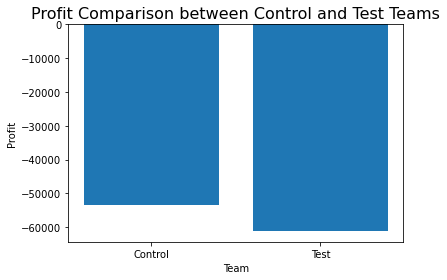

<Figure size 576x360 with 0 Axes>

In [95]:
teams = ['Control', 'Test']
profits = [control_profit, test_profit]

plt.bar(teams, profits)
plt.xlabel('Team')
plt.ylabel('Profit')
plt.title('Profit Comparison between Control and Test Teams', fontsize = 16)
plt.figure(figsize = (8,5))
plt.show();